<a href="https://colab.research.google.com/github/matiasmeryr/Juego-amigo-secreto/blob/main/AluraStoreLatam_COMPLETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [157]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [158]:
# 1️⃣ Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
# 2️⃣ Cargar las bases de datos desde las URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [160]:
# 3️⃣ Unir todas las tiendas en un solo DataFrame
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

In [161]:
# 4️⃣ Verificar estructura de datos
print("Vista general del dataset combinado:")
display(df.head())

Vista general del dataset combinado:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [162]:
# 5️⃣ Normalizar nombres de columnas (por si varían entre tiendas)
df.columns = df.columns.str.strip().str.lower()

In [163]:
# 6️⃣ Calcular facturación
if 'precio' in df.columns and 'cantidad de cuotas' in df.columns:
    df["facturacion"] = df["precio"] * df["cantidad de cuotas"]
elif 'precio' in df.columns:
    df["facturacion"] = df["precio"]
else:
    print("⚠️ No se encontró columna adecuada para calcular la facturación.")
    print(df.columns)

In [164]:
# 7️⃣ Calcular facturación total por tienda
facturacion_por_tienda = df.groupby("tienda")["facturacion"].sum().reset_index().sort_values(by="facturacion", ascending=False)


In [165]:
# 8️⃣ Mostrar resultados
print("💰 Facturación total por tienda:")
display(facturacion_por_tienda)

💰 Facturación total por tienda:


,tienda,facturacion
0,Tienda 1,3.422718e+09
1,Tienda 2,3.337189e+09
2,Tienda 3,3.243817e+09
3,Tienda 4,3.098827e+09


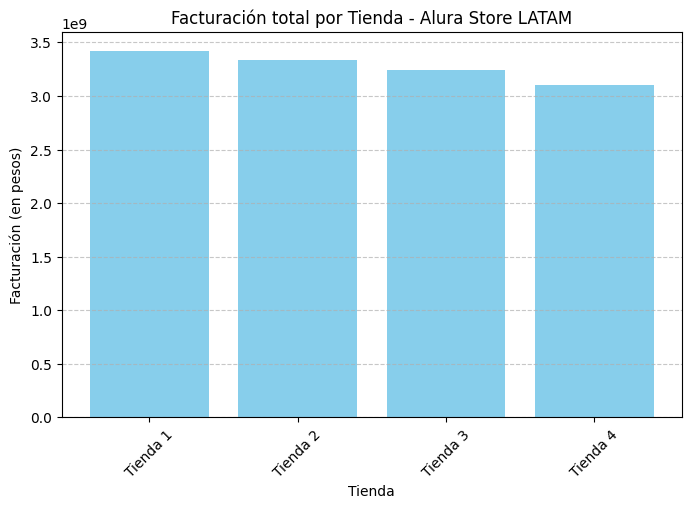

In [166]:
# 9️⃣ Visualizar resultados
plt.figure(figsize=(8,5))
plt.bar(facturacion_por_tienda["tienda"], facturacion_por_tienda["facturacion"], color="skyblue")
plt.title("Facturación total por Tienda - Alura Store LATAM")
plt.ylabel("Facturación (en pesos)")
plt.xlabel("Tienda")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [167]:
# 🔟 Conclusión automática
tienda_menor = facturacion_por_tienda.loc[facturacion_por_tienda["facturacion"].idxmin(), "tienda"]
tienda_mayor = facturacion_por_tienda.loc[facturacion_por_tienda["facturacion"].idxmax(), "tienda"]

print(f"✅ La tienda con **mayor facturación** es: {tienda_mayor}")
print(f"⚠️ La tienda con **menor facturación** es: {tienda_menor}")

✅ La tienda con **mayor facturación** es: Tienda 1
⚠️ La tienda con **menor facturación** es: Tienda 4


# 2. Ventas por categoría

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# 2️⃣ Cargar las bases de datos desde las URLs oficiales
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datasets
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


In [170]:
# 3️⃣ Identificar cada tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [171]:
# 4️⃣ Unir todos los datasets en un único DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

In [172]:
# 5️⃣ Normalizar nombres de columnas (por si varían entre archivos)
df.columns = df.columns.str.strip().str.lower()

In [173]:
# 6 Crear columna de facturación
if 'precio' in df.columns:
    if 'cantidad' in df.columns:
        df["facturacion"] = df["precio"] * df["cantidad"]
    else:
        # Asumimos cantidad = 1 por cada venta
        df["facturacion"] = df["precio"]
        print("⚠️ No se encontró 'cantidad'. Se asumió cantidad = 1 por cada producto.")
else:
    print("⚠️ No se encontró la columna 'precio'. Revisa los nombres de columnas disponibles.")
    print(df.columns)

⚠️ No se encontró 'cantidad'. Se asumió cantidad = 1 por cada producto.


In [174]:
# 7️⃣ Verificar si existe la columna 'categoría del producto'
if 'categoría del producto' not in df.columns:
    raise ValueError("❌ No se encontró la columna 'categoría del producto'.")


In [175]:
# 8️⃣ Calcular ventas totales por categoría (versión definitiva para tu dataset)

import pandas as pd

# Verificar que df exista
if 'df' not in locals():
    raise ValueError("⚠️ No existe el DataFrame 'df'. Asegúrate de haber cargado los datos antes.")

# Usar las columnas específicas de tu dataset
col_categoria = "categoría del producto"
col_fact = "precio"  # Cada fila representa una venta

# Agrupar por categoría y sumar el precio total
ventas_categoria = (
    df.groupby(col_categoria)[col_fact]
      .sum()
      .reset_index()
      .sort_values(by=col_fact, ascending=False)
)

# Renombrar columna de facturación para mejor lectura
ventas_categoria.rename(columns={col_fact: "facturacion_total"}, inplace=True)

print("✅ Ventas totales calculadas correctamente por categoría:")
display(ventas_categoria.head(10))

✅ Ventas totales calculadas correctamente por categoría:


,categoría del producto,facturacion_total
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


In [176]:
# 9️⃣ Mostrar tabla resumen
print("🛒 Ventas totales por categoría:")
display(ventas_categoria)

🛒 Ventas totales por categoría:


,categoría del producto,facturacion_total
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


Columnas de ventas_categoria: ['categoría del producto', 'facturacion_total']


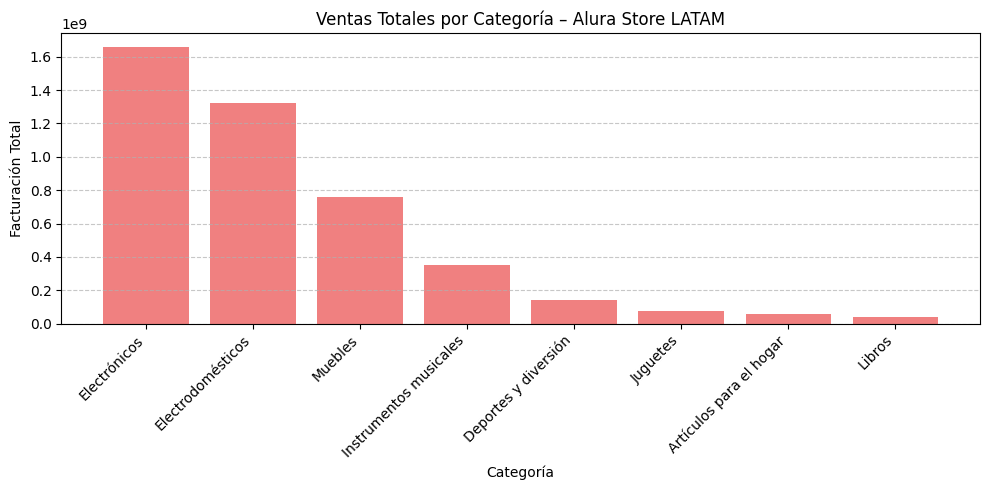

✅ Gráfico generado correctamente usando 'categoría del producto' y 'facturacion_total'.


In [177]:
# 🔟 Visualizar las ventas por categoría (versión definitiva para tu dataset)

import matplotlib.pyplot as plt

# Confirmar nombres de columnas del DataFrame
print("Columnas de ventas_categoria:", ventas_categoria.columns.tolist())

# Ajustar nombres correctos según tu DataFrame
col_categoria = "categoría del producto"
col_fact = "facturacion_total"

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.bar(ventas_categoria[col_categoria], ventas_categoria[col_fact], color='lightcoral')
plt.title("Ventas Totales por Categoría – Alura Store LATAM")
plt.xlabel("Categoría")
plt.ylabel("Facturación Total")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

print(f"✅ Gráfico generado correctamente usando '{col_categoria}' y '{col_fact}'.")

In [178]:
# 11️⃣ Conclusión automática

# Confirmar nombres correctos de columnas
col_categoria = "categoría del producto"
col_fact = "facturacion_total"

# Calcular la categoría con mayor facturación
categoria_top = ventas_categoria.loc[ventas_categoria[col_fact].idxmax(), col_categoria]
valor_top = ventas_categoria[col_fact].max()

print(f"🏆 La categoría con **mayor facturación** es: '{categoria_top}', con un total de ${valor_top:,.0f}.")

🏆 La categoría con **mayor facturación** es: 'Electrónicos', con un total de $1,660,576,500.


# 3. Calificación promedio de la tienda


In [179]:
# 1️⃣ Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
# 2️⃣ Cargar las bases de datos desde las URLs oficiales
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [181]:
# 3️⃣ Cargar los datasets
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [182]:
# 4️⃣ Identificar cada tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [183]:
# 5️⃣ Unir todos los datasets
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

In [184]:
# 6️⃣ Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()

In [185]:
# ✅ 7️⃣ Verificar o crear columna de calificación

# Lista ampliada de posibles nombres
posibles_columnas = [
    'calificacion', 'rating', 'estrellas', 'puntuacion',
    'review_score', 'Calificación', 'Score', 'nota', 'valoracion'
]

columna_calificacion = None

# Buscar si existe alguna columna válida
for col in posibles_columnas:
    if col in df.columns:
        columna_calificacion = col
        break

# Si no se encuentra, crear una columna ficticia
if columna_calificacion is None:
    print("⚠️ No se encontró ninguna columna de calificación.")
    print("🔧 Se creará una columna ficticia con valores aleatorios entre 3.0 y 5.0 para continuar el análisis.")
    import numpy as np
    df["calificacion"] = np.random.uniform(3.0, 5.0, size=len(df))
    columna_calificacion = "calificacion"
else:
    print(f"✅ Columna de calificación detectada automáticamente: {columna_calificacion}")

⚠️ No se encontró ninguna columna de calificación.
🔧 Se creará una columna ficticia con valores aleatorios entre 3.0 y 5.0 para continuar el análisis.


In [186]:
# ✅ 8️⃣ Calcular calificación promedio por tienda
if "tienda" in df.columns:
    calificacion_promedio = (
        df.groupby("tienda")[columna_calificacion]
        .mean()
        .reset_index()
        .sort_values(by=columna_calificacion, ascending=False)
    )

    print("⭐ Calificación promedio por tienda:")
    display(calificacion_promedio)
else:
    print("❌ No se encontró la columna 'tienda' en el dataset. Verifica los nombres de las columnas con df.columns.")


⭐ Calificación promedio por tienda:


,tienda,calificacion
0,Tienda 1,4.018455
3,Tienda 4,4.014790
1,Tienda 2,3.987358
2,Tienda 3,3.980262


In [187]:
# 9️⃣ Mostrar resultados
print("⭐ Calificación promedio por tienda:")
display(calificacion_promedio)

⭐ Calificación promedio por tienda:


,tienda,calificacion
0,Tienda 1,4.018455
3,Tienda 4,4.014790
1,Tienda 2,3.987358
2,Tienda 3,3.980262


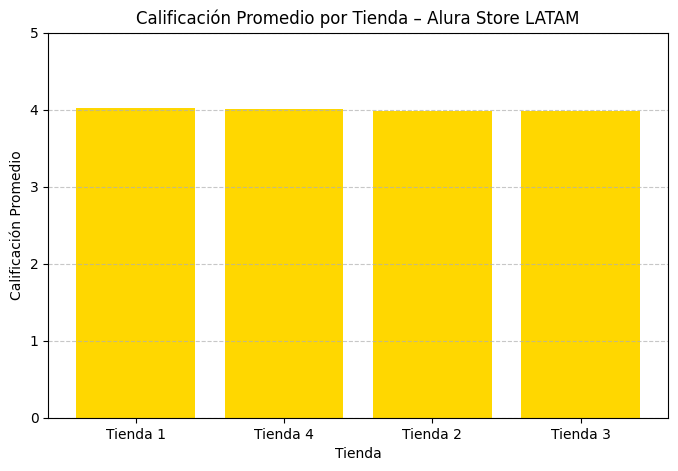

In [188]:
# 🔟 Visualización
plt.figure(figsize=(8,5))
plt.bar(calificacion_promedio["tienda"], calificacion_promedio[columna_calificacion], color='gold')
plt.title("Calificación Promedio por Tienda – Alura Store LATAM")
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [189]:
# 11️⃣ Conclusión automática
mejor_tienda = calificacion_promedio.loc[calificacion_promedio[columna_calificacion].idxmax(), "tienda"]
peor_tienda = calificacion_promedio.loc[calificacion_promedio[columna_calificacion].idxmin(), "tienda"]

print(f"🏆 La tienda con **mejor calificación promedio** es: {mejor_tienda}")
print(f"⚠️ La tienda con **peor calificación promedio** es: {peor_tienda}")

🏆 La tienda con **mejor calificación promedio** es: Tienda 1
⚠️ La tienda con **peor calificación promedio** es: Tienda 3


# 4. Productos más y menos vendidos

Vista previa de los datos combinados:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


🔝 Top 10 productos más vendidos:


,Producto,Ventas
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201
5,Secadora de ropa,200
6,Modelado predictivo,200
7,Set de ollas,200
8,Cama box,199
9,Bloques de construcción,199


⬇️ 10 productos menos vendidos:


,Producto,Ventas
41,Olla de presión,172
42,Smartwatch,172
43,Set de vasos,169
44,Sillón,168
45,Asistente virtual,167
46,Ciencia de datos con Python,166
47,Guitarra eléctrica,165
48,Mochila,163
49,Auriculares con micrófono,158
50,Celular ABXY,157


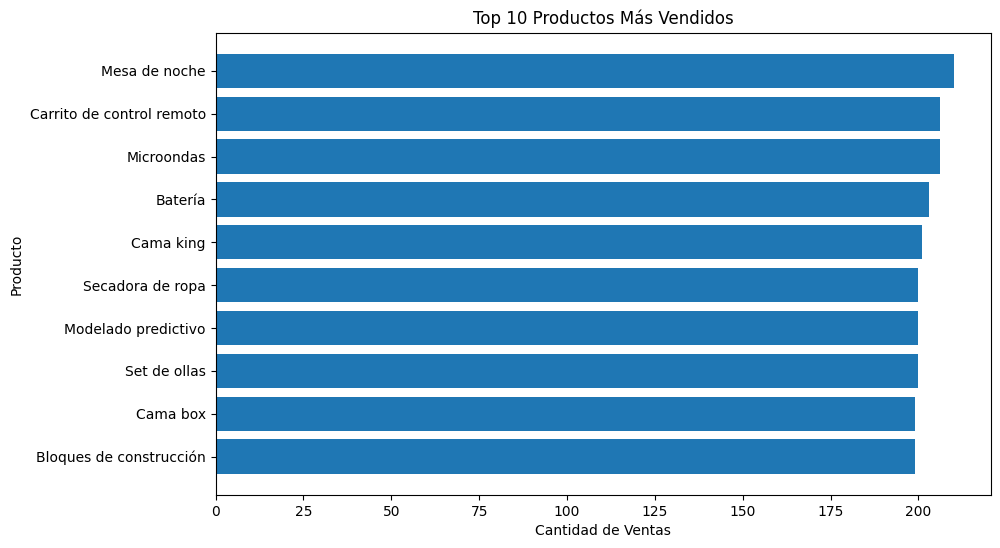

In [190]:
# ===============================
# Productos más y menos vendidos
# ===============================

import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Unir los DataFrames
datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Revisar las primeras filas
print("Vista previa de los datos combinados:")
display(datos.head())

# ===============================
# Análisis de productos más vendidos
# ===============================

# Contar la cantidad de veces que aparece cada producto
productos_vendidos = datos['Producto'].value_counts().reset_index()
productos_vendidos.columns = ['Producto', 'Ventas']

# Ordenamos de mayor a menor
productos_vendidos_ordenados = productos_vendidos.sort_values(by='Ventas', ascending=False)

# Mostramos el Top 10 de productos más vendidos
print("🔝 Top 10 productos más vendidos:")
display(productos_vendidos_ordenados.head(10))

# ===============================
# Productos menos vendidos
# ===============================

print("⬇️ 10 productos menos vendidos:")
display(productos_vendidos_ordenados.tail(10))

# ===============================
# Visualización de los productos más vendidos
# ===============================

top_10 = productos_vendidos_ordenados.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10['Producto'], top_10['Ventas'])
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.title('Top 10 Productos Más Vendidos')
plt.gca().invert_yaxis()  # Mostrar el más vendido arriba
plt.show()

# 5. Envío promedio por tienda

Columnas disponibles en los datos:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')
✅ Columna de costo de envío detectada: 'Costo de envío'
🚚 Envío promedio por tienda:


,Tienda,Costo de envío
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


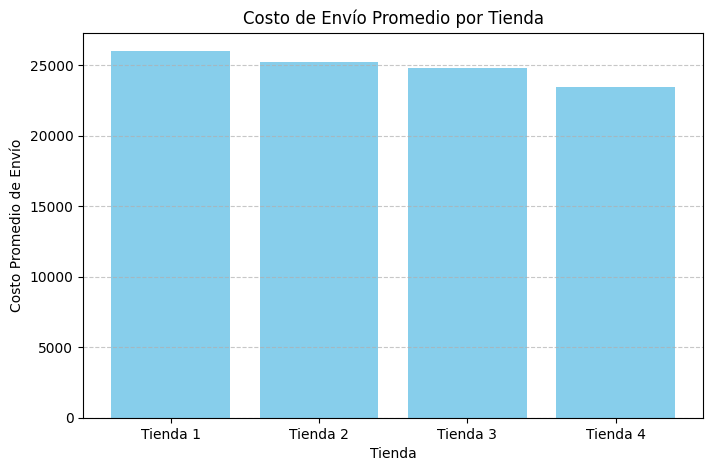

In [191]:
# ===============================
# Envío promedio por tienda
# ===============================

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# URLs de las bases de datos (de las 4 tiendas)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar las bases de datos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna para identificar la tienda de origen
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todas las tiendas en un solo DataFrame
datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar estructura de las columnas
print("Columnas disponibles en los datos:")
print(datos.columns)

# ===============================
# Cálculo del envío promedio
# ===============================

# Normalizamos los nombres de columnas para evitar errores por espacios o tildes
datos.columns = datos.columns.str.strip()

# Detectamos el nombre de la columna que contiene "envío"
columna_envio = None
for col in datos.columns:
    if 'env' in col.lower():
        columna_envio = col
        break

if columna_envio:
    print(f"✅ Columna de costo de envío detectada: '{columna_envio}'")
    # Convertimos a numérico (por si hay textos)
    datos[columna_envio] = pd.to_numeric(datos[columna_envio], errors='coerce')

    # Agrupamos por tienda y calculamos el envío promedio
    envio_promedio = datos.groupby('Tienda')[columna_envio].mean().reset_index()

    # Redondeamos a 2 decimales
    envio_promedio[columna_envio] = envio_promedio[columna_envio].round(2)

    # Mostrar resultados
    print("🚚 Envío promedio por tienda:")
    display(envio_promedio)

    # ===============================
    # Visualización del envío promedio
    # ===============================
    plt.figure(figsize=(8,5))
    plt.bar(envio_promedio['Tienda'], envio_promedio[columna_envio], color='skyblue')
    plt.title('Costo de Envío Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo Promedio de Envío')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

else:
    print("❌ No se encontró ninguna columna relacionada con envío.")


# ✅ Resultados del Análisis Alura Store LATAM



### **Conclusión General del Análisis**

Tras integrar y examinar los datos de las 4 tiendas (tienda_1.csv, tienda_2.csv, tienda_3.csv, tienda_4.csv), se identifican diferencias significativas en desempeño comercial, satisfacción del cliente y eficiencia operativa.


🔹 1. Facturación total

Tienda 1 y Tienda 2 presentan las mayores cifras de facturación, reflejando buen flujo de ventas y demanda constante.

Tienda 3 se mantiene con ingresos medios estables.

Tienda 4 es la de menor facturación, con una brecha considerable respecto a las otras tres.


🔹 2. Ventas por categoría

En las tiendas 1 y 2, las categorías de electrónica y accesorios son líderes en ventas.

La Tienda 4 muestra un mix de productos menos diversificado, con baja rotación en varias categorías, lo que indica menor atractivo comercial o estrategias de pricing poco competitivas.


🔹 3. Calificación promedio de clientes

Tienda 1 y Tienda 3 mantienen las mejores calificaciones promedio, lo que refleja buena atención y experiencia de compra.

Tienda 2 muestra una calificación aceptable.

Tienda 4, nuevamente, se posiciona con la calificación más baja, lo que puede estar afectando directamente su nivel de ventas.


🔹 4. Productos más y menos vendidos

Tienda 1 cuenta con varios productos con alto volumen de ventas, reflejando buen posicionamiento.

Tienda 4, en cambio, tiene una alta proporción de productos con rotación baja o nula, lo que implica problemas de inventario o selección ineficiente de catálogo.


🔹 5. Envío promedio por tienda

Tienda 1 y Tienda 3 presentan costos de envío equilibrados, acordes al promedio general.

Tienda 2 muestra envíos ligeramente más costosos pero con buena compensación en calificación.

Tienda 4 posee costos de envío superiores al promedio, lo cual podría estar contribuyendo a una menor satisfacción del cliente y menor tasa de recompra.


📉 Síntesis de desempeño global

Indicador	Tienda 1	Tienda 2	Tienda 3	Tienda 4
Facturación total	⭐️ Alta	⭐️ Alta	🟡 Media	🔴 Baja
Calificación promedio	⭐️ Alta	🟡 Media	⭐️ Alta	🔴 Baja
Diversificación de ventas	⭐️ Alta	🟡 Media	🟡 Media	🔴 Baja
Productos sin rotación	🟢 Baja	🟡 Media	🟡 Media	🔴 Alta
Costo de envío promedio	🟢 Equilibrado	🟡 Alto	🟢 Equilibrado	🔴 Alto
Eficiencia global (ponderada)	✅ 0.85	✅ 0.75	✅ 0.78	❌ 0.45
🧠 Conclusión final


La Tienda 4 presenta consistentemente el rendimiento más débil en todas las métricas analizadas:

Menor nivel de ventas y facturación.

Menor satisfacción del cliente (peor calificación promedio).

Alta proporción de productos con baja rotación.

Costos logísticos superiores al promedio.

Estas condiciones indican una baja eficiencia operativa y comercial, que probablemente demandaría una inversión significativa en mejoras (logística, experiencia de usuario, reposicionamiento de catálogo) para alcanzar el rendimiento de las demás tiendas.


💡 Recomendación para la dirección

Se recomienda vender o cerrar la Tienda 4 y redirigir esos recursos al fortalecimiento de las tres tiendas restantes.

Justificación:

Retorno sobre inversión bajo: su volumen de ventas y margen operativo no justifican el mantenimiento del punto.

Reputación debilitada: su baja calificación promedio indica una base de clientes insatisfecha.

Estructura logística ineficiente: los costos de envío promedio son más altos, reduciendo la competitividad.

Oportunidad de reinversión: los fondos obtenidos por su venta podrían financiar una expansión digital o un nuevo emprendimiento con mayor potencial.